<a href="https://colab.research.google.com/github/Aravind-11/Aerial-Navigation/blob/main/Aerial_Nav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.0

TensorFlow 1.x selected.
     |████████████████████████████████| 248 kB 5.2 MB/s 
  Attempting uninstall: stable-baselines
    Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


In [ ]:
import numpy as np
import gym
from random import random 
class Football:  # The class encapsulating the environment
    '''
    Actions [0 : Stand, 1 : Up, 2 : Right, 3 : Down, 4 : Left]
    These are the representing no.s for the mentioned actions
    '''

    def __init__(self, length=30, width=30, goalPositions=[15,29]):
        
        # The player start at random locations
        
        self.pA=[np.random.randint(30),np.random.randint(30)] 
        self.pO=[6,8]
            
        
        self.h = length   # Length of the Football Pitch    
        self.w = width    # Width of the Football Pitch
        
        self.goalPositions = np.array(goalPositions)   # This means that the middle 4 positions at the right and left are the goals
        
     
        
        self.reward = 0                            # Initially the reward is 0
        
        self.observation=np.random.rand(6,)
        self.done = bool(0)                          # This stores whether the game needs to be restart with new position (in the case of a goal)

    def reset(self):
        self.done = bool(0)
        self.reward = 0
        
        self.pA = np.array([np.random.randint(self.h), np.random.randint(self.h)])
        self.pA = np.array([15,0])
        #self.pO=[6,8]
        self.x_traj,self.y_traj=[],[]
        self.xo_traj,self.yo_traj=[],[]
        return np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)

    def step(self, action):
        if self.done == bool(1):
          self.reset()
        self.move(first, action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done
        if not done:
            self.current_player_num = (self.current_player_num + 1) % 2   
        return self.observation,self.reward, self.done,{}

    def move(self, player, action):
        opponent = 1 - player
        
        newPosition = self.pA + self.actionToMove(action)
        
        if self.ballOwner is player and self.isInGoal(*newPosition) >= 0:
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        elif self.isInBoard(*newPosition):
            self.positions[player] = newPosition
        if(self.ballOwner!=0):
          self.reward=-1
        return -1



    def isInBoard(self, x, y):
        if(x<0 or x>(30)):
          return 0
        if(y<0 or y>(30)):
          return 0 
        return 1
        

    #def choosePlayer(self):
    #    return np.random.randint(0, 2)
    def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
        plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
        plot_vehicle(x, y, theta, x_traj, y_traj)

class modf_football(Football,gym.Env):
  def __init__(self, length=30, width=30, goalPositions=np.array([15, 29])):
    super().__init__()
    self.observation_space=gym.spaces.Box(low=-30, high=60,
                                        shape=(7,), dtype=np.float32)
    self.reward=0
    self.action_space = gym.spaces.Box(
            low=-2*np.pi, high=2*np.pi, shape=(1,), dtype=np.float32
        )
    self.name='Football'
    self.current_player_num=0
    self.observation=np.random.rand(6,)
    self.pA=np.array([np.random.randint(30),np.random.randint(30)]) 
    self.pA=np.array([0,15]) 
    self.Kp_rho = 9
    self.dt=0.01
    self.Kp_alpha = 15
    self.Kp_beta = -3
    self.x_goal = 29
    self.y_goal = 15
    self.theta_goal = 0 
    self.theta_start = 2 * np.pi * random() - np.pi
    
    self.theta = self.theta_start

    self.x_diff = self.x_goal - self.pA[0]
    self.y_diff = self.y_goal - self.pA[1]

    self.x_traj, self.y_traj = [], []
    self.xo_traj, self.yo_traj = [], []
    self.x_start=self.pA[0]
    self.y_start=self.pA[1]
    self.rho = np.hypot(self.x_diff, self.y_diff)
  #modifying the step and move function to get the updated reward system
  def step(self, action):
        
        #print('action',action)
        if self.done == bool(1):
          self.reset()
        
      
        self.move(action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done,{}
        #print(type(self.reward))           
        return self.observation,self.reward, self.done,{}
  
  def move(self, action):
        self.x_diff = self.x_goal - self.pA[0]
        self.y_diff = self.y_goal - self.pA[1]
        self.rho=np.hypot(self.x_diff,self.y_diff)
        v = self.Kp_rho * self.rho
        #v=9
        #w = self.Kp_alpha * action[0] + self.Kp_beta * action[1]
        #if action[0] > np.pi / 2 or action[0] < -np.pi / 2:
        #    v = -v
        #elif (self.pA[0]==0 and self.pA[1]==29) or (self.pA[1]==0 and self.pA[0]==29):
        #  v=-v
        self.theta = action
        x = self.pA[0] +  v* np.cos(action) * self.dt
        y = self.pA[1] +  v* np.sin(action) * self.dt
        newPosition = np.array([x,y])
        self.x_traj.append(x)
        self.y_traj.append(y)
        self.xo_traj.append(self.pO[0])
        self.yo_traj.append(self.pO[1])
        if (self.pO[0]>self.pA[0]):
          self.pO[0]-=0.5
        elif (self.pO[0]<self.pA[0]):
          self.pO[0]+=0.5
        if (self.pO[1]>self.pA[1]):
          self.pO[1]-=0.5
        elif (self.pO[1]<self.pA[1]):
          self.pO[1]+=0.5
        
        self.pO[0]=max(self.pO[0],0)
        self.pO[0]=min(self.pO[0],29)
        self.pO[1]=max(self.pO[1],0)
        self.pO[1]=min(self.pO[1],29)
        

        if self.isInGoal(*newPosition) >= 0:
            
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        if self.isInBoard(*newPosition):
               
            self.reward =  -0.1 * (abs(self.pA[0]-self.goalPositions[0])+ abs(self.pA[1]-self.goalPositions[1])) #+ 0.01*(abs(newPosition[0]-7)+abs(newPosition[1]-7)) +0.01*(abs(newPosition[0]-5)+abs(newPosition[1]-17))+0.01*(abs(newPosition[0]-10)+abs(newPosition[1]-13))
            self.pA = newPosition

        
        self.observation=np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)
        return -1
  def isInGoal(self, x, y):
     x_diff = self.x_goal - x
     y_diff = self.y_goal - y
     rho = np.hypot(x_diff, y_diff)
     if(rho<0.001):
       self.done=bool(1)
       self.reward=20  
     return -1
  def transformation_matrix(self,x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])
  def plot_vehicle(self,x, y, theta, x_traj, y_traj,xo_traj, yo_traj,xo,yo):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T1 = self.transformation_matrix(x, y, theta)
    T2 = self.transformation_matrix(xo, yo, theta)

    p1 = np.matmul(T1, p1_i)
    p2 = np.matmul(T1, p2_i)
    p3 = np.matmul(T1, p3_i)

    p1o = np.matmul(T2, p1_i)
    p2o = np.matmul(T2, p2_i)
    p3o = np.matmul(T2, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')

    plt.plot([p1o[0], p2o[0]], [p1o[1], p2o[1]], 'k-')
    plt.plot([p2o[0], p3o[0]], [p2o[1], p3o[1]], 'k-')
    plt.plot([p3o[0], p1o[0]], [p3o[1], p1o[1]], 'k-')

   
    plt.style.use('seaborn')
    plt.scatter([18,7,10],[15,7,13],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    
    plt.plot(x_traj, y_traj, 'b--')
    
    plt.plot(xo_traj, yo_traj,'r--')
    
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    
    plt.pause(self.dt)
  def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(self.x_start, self.y_start, np.cos(self.theta_start),
                      np.sin(self.theta_start), color='r', width=0.1)
        plt.arrow(self.x_goal, self.y_goal, np.cos(self.theta_goal),
                      np.sin(self.theta_goal), color='g', width=0.1)
        self.plot_vehicle(self.pA[0], self.pA[1], self.theta, self.x_traj, self.y_traj,self.xo_traj,self.yo_traj,self.pO[0],self.pO[1])
  def seed():
      return 0 
  def metadata(x):
      return 0 
  def legal_actions(self):
    return gym.spaces.Discrete(5)
  def close(self):
    pass

env=modf_football(Football,gym.Env)

In [ ]:
from stable_baselines.common.env_checker import check_env

check_env(env, warn=True)

/usr/local/lib/python3.7/dist-packages/stable_baselines/common/env_checker.py:210: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn("We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
from stable_baselines import DQN, PPO2, A2C, ACKTR
from stable_baselines.common.cmd_util import make_vec_env

env = make_vec_env(lambda: env, n_envs=1)

In [ ]:
model = PPO2('MlpPolicy', env, verbose=1).learn(50000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Streaming output truncated to the last 5000 lines.
| n_updates          | 6             |
| policy_entropy     | 1.4156908     |
| policy_loss        | -0.0005955044 |
| serial_timesteps   | 768           |
| time_elapsed       | 1.05          |
| total_timesteps    | 768           |
| value_loss         | 1861.7269     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00010542042 |
| clipfrac           | 0.0           |
| explained_variance | -0.000561     |
| fps                | 811           |
| n_updates          | 7             |
| policy_entropy     | 1.4159524     |
| policy_loss        | 0.0010197932  |
| serial_timesteps   | 896           |
| time_elapsed       | 1.21          |
| total_timesteps    | 896           |
| value_loss         | 1984.7119     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0011748521  |
| clipfrac           | 0.001953125   |
| explained_v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 1
Action:  [[1.3509617]]
obs= [[15.402695   1.8022033 -0.4026947 13.197797   1.3509617 15.
  28.5      ]] reward= [-2.9] done= [False]


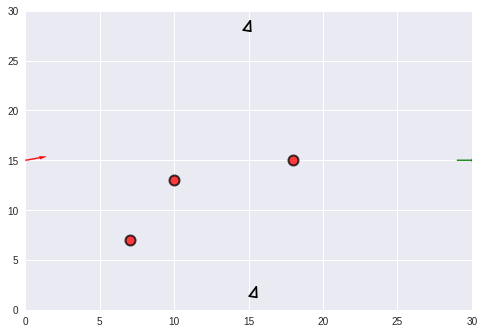

Step 2
Action:  [[1.4097286]]
obs= [[15.676196   3.4855485 -0.6761961 11.514452   1.4097286 15.5
  28.       ]] reward= [-2.760049] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


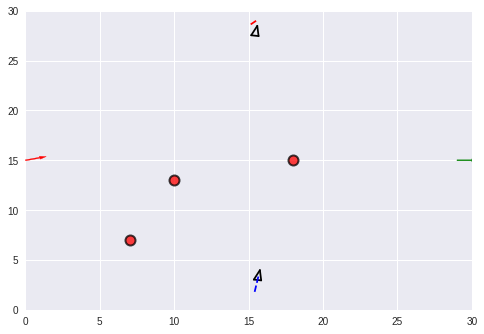

Step 3
Action:  [[1.5008404]]
obs= [[15.786978    5.066557   -0.78697777  9.933443    1.5008404  16.
  27.5       ]] reward= [-2.6190648] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


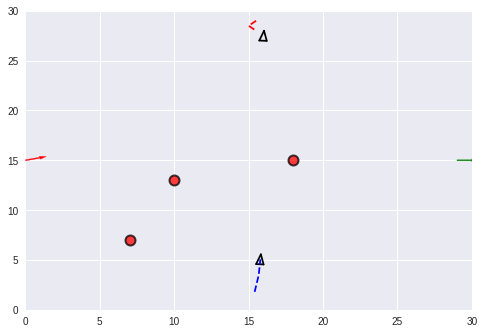

Step 4
Action:  [[1.5771631]]
obs= [[15.777506   6.554271  -0.7775059  8.445728   1.5771631 15.5
  27.       ]] reward= [-2.472042] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


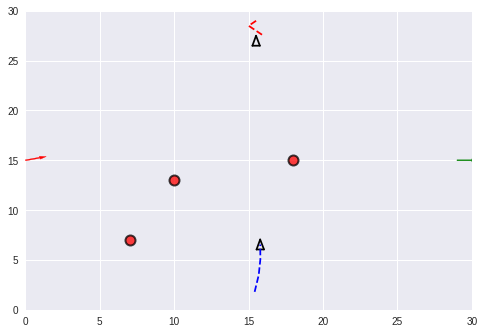

Step 5
Action:  [[1.60562]]
obs= [[15.728342    7.965482   -0.72834206  7.034518    1.60562    16.
  26.5       ]] reward= [-2.3223236] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


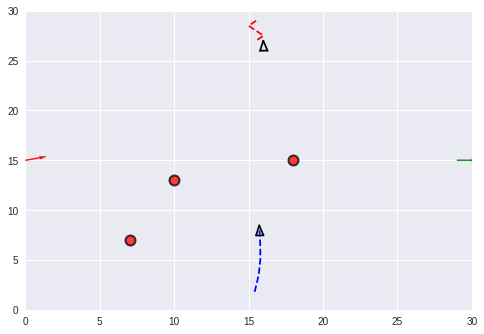

Step 6
Action:  [[1.6893581]]
obs= [[15.568438   9.307855  -0.5684376  5.6921453  1.6893581 15.5
  26.       ]] reward= [-2.176286] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


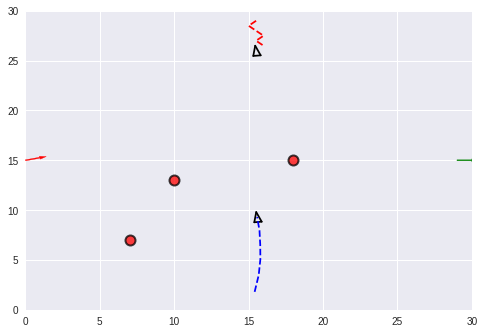

Step 7
Action:  [[1.7143444]]
obs= [[15.380618  10.607264  -0.3806181  4.3927364  1.7143444 16.
  25.5      ]] reward= [-2.0260584] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


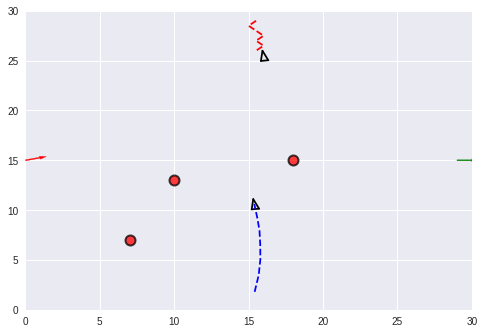

Step 8
Action:  [[1.7644148]]
obs= [[15.132808   11.871121   -0.13280773  3.1288786   1.7644148  15.5
  25.        ]] reward= [-1.8773354] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


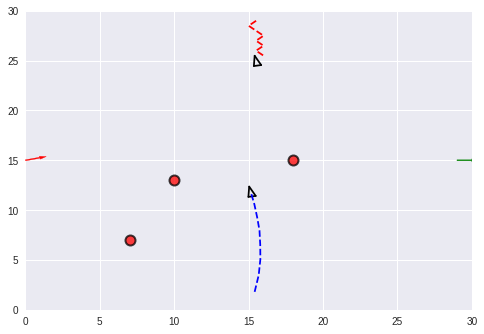

Step 9
Action:  [[1.7542849]]
obs= [[14.8993635  13.1290655   0.10063648  1.8709345   1.7542849  15.
  24.5       ]] reward= [-1.7261689] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


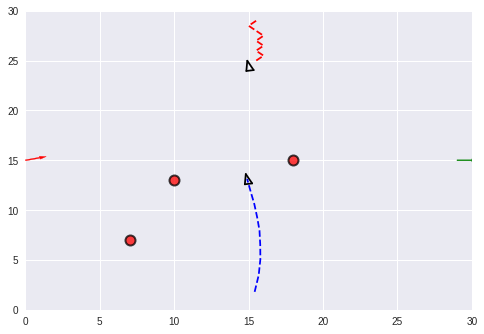

Step 10
Action:  [[1.7343304]]
obs= [[14.690943   14.392165    0.30905724  0.6078348   1.7343304  14.5
  24.        ]] reward= [-1.5971571] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


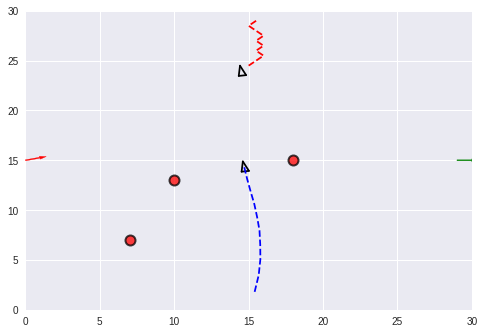

Step 11
Action:  [[1.7213106]]
obs= [[14.497665   15.666569    0.5023346  -0.66656876  1.7213106  15.
  23.5       ]] reward= [-1.4916892] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


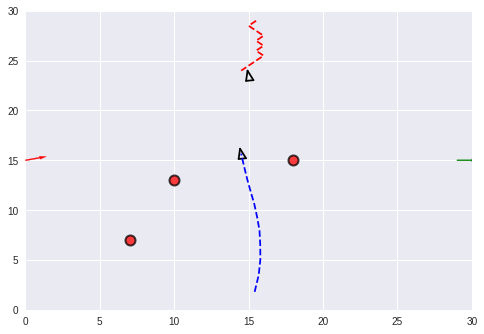

Step 12
Action:  [[1.7534848]]
obs= [[14.260292   16.951414    0.73970795 -1.9514141   1.7534848  14.5
  23.        ]] reward= [-1.3835766] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


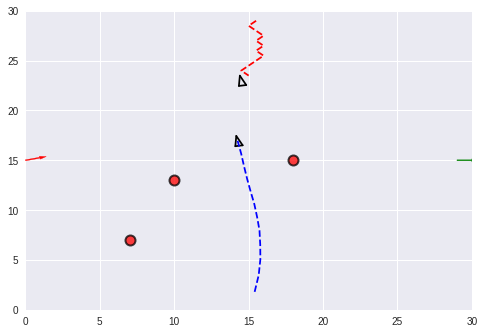

Step 13
Action:  [[1.7450625]]
obs= [[14.028276   18.269295    0.97172356 -3.2692947   1.7450625  14.
  22.5       ]] reward= [-1.2788295] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


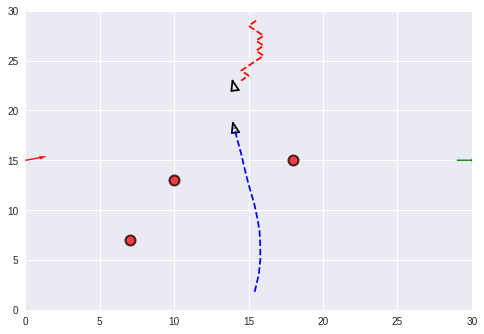

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 14
Action:  [[1.7448788]]
obs= [[13.7893915 19.627655   1.2106085 -4.627655   1.7448788 14.5
  22.       ]] reward= [-1.1702429] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


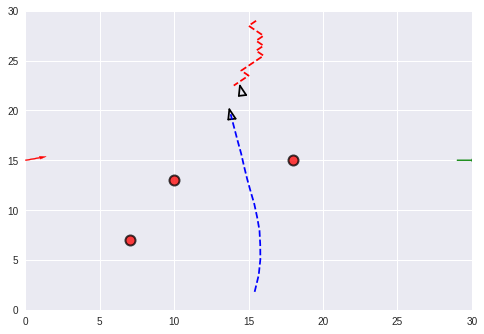

Step 15
Action:  [[1.7729746]]
obs= [[13.50206   21.029419   1.4979401 -6.029419   1.7729746 14.
  21.5      ]] reward= [-1.0582954] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


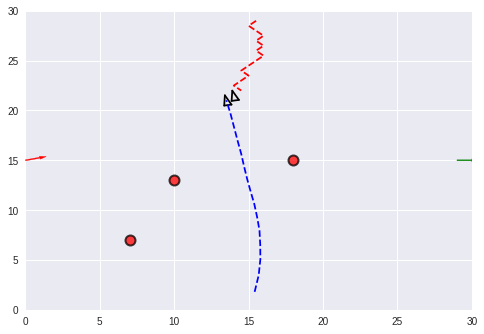

Step 16
Action:  [[1.7579192]]
obs= [[13.223633  22.499947   1.7763672 -7.4999466  1.7579192 13.5
  21.       ]] reward= [-0.94685215] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


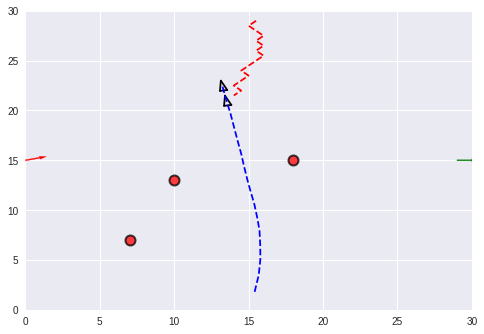

Step 17
Action:  [[1.7397227]]
obs= [[12.959316  24.049719   2.0406837 -9.049719   1.7397227 13.
  21.5      ]] reward= [-0.8276421] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


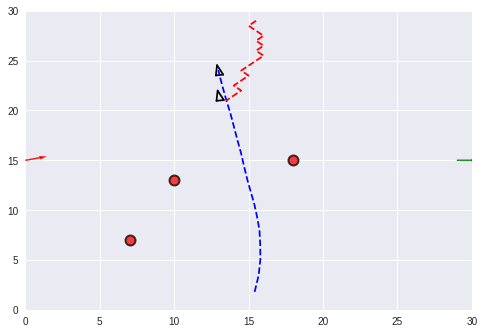

Step 18
Action:  [[1.5922998]]
obs= [[ 12.923676   25.706902    2.0763245 -10.706902    1.5922998  12.5
   22.       ]] reward= [-0.6990965] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


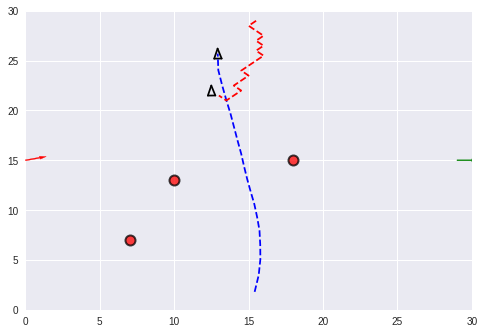

Step 19
Action:  [[1.4761577]]
obs= [[ 13.087949   27.437511    1.9120512 -12.437511    1.4761577  13.
   22.5      ]] reward= [-0.5369423] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


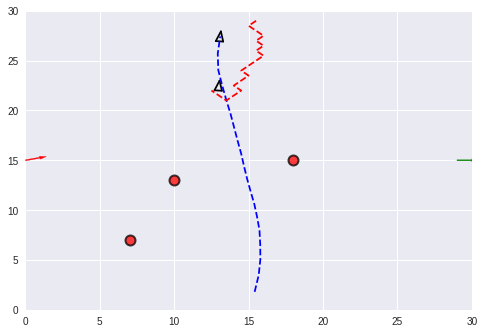

Step 20
Action:  [[1.4998144]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.4998144  13.5
   23.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


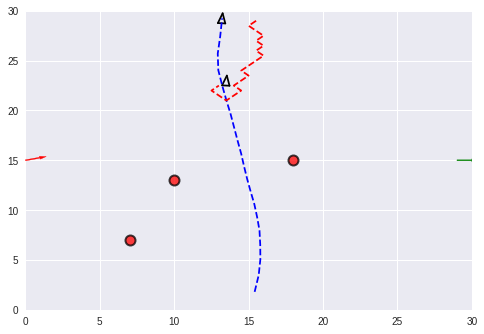

Step 21
Action:  [[1.4881394]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.4881394  13.
   23.5      ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


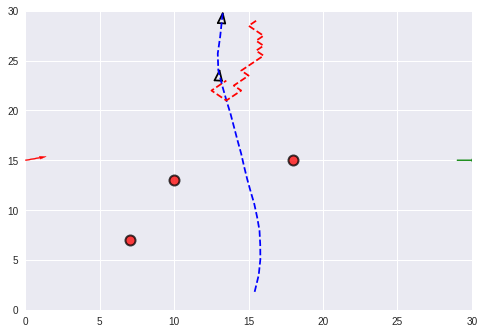

Step 22
Action:  [[1.3825306]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.3825306  13.5
   24.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


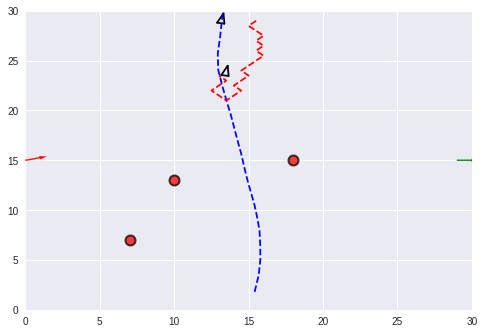

Step 23
Action:  [[1.3672782]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.3672782  13.
   24.5      ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


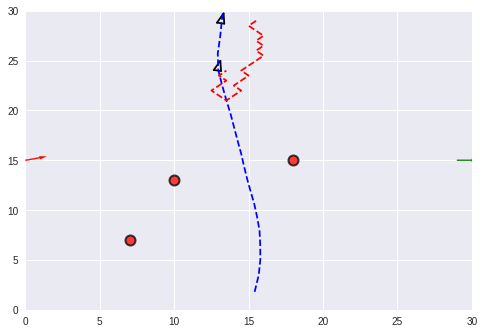

Step 24
Action:  [[1.247704]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.247704   13.5
   25.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


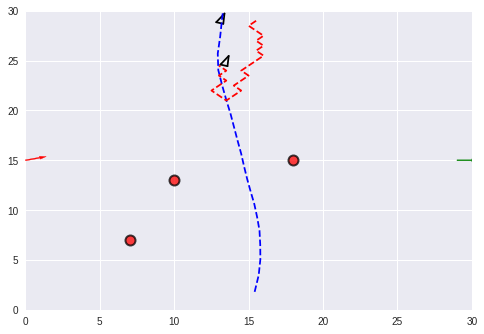

Step 25
Action:  [[1.2279321]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.2279321  13.
   25.5      ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


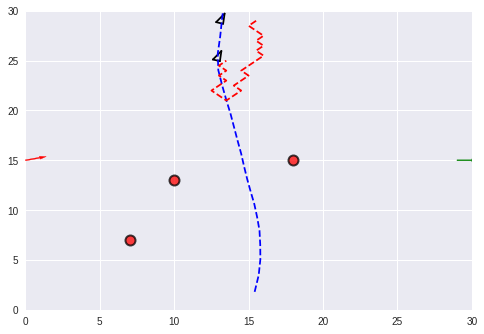

Step 26
Action:  [[1.1041135]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.1041135  13.5
   26.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


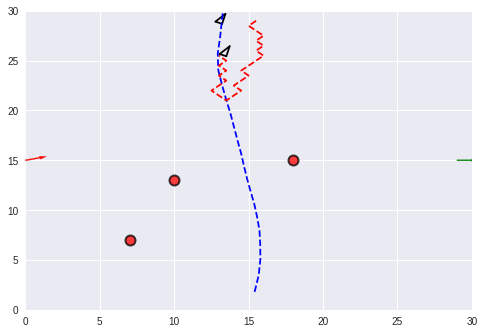

Step 27
Action:  [[1.0809826]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    1.0809826  13.
   26.5      ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


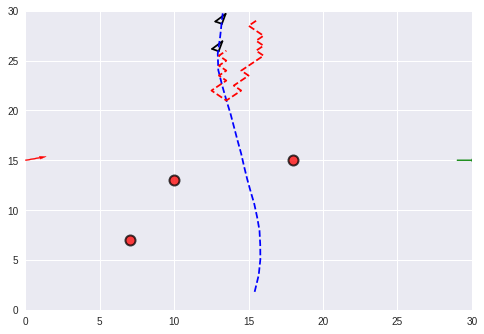

Step 28
Action:  [[0.965707]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.965707   13.5
   27.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


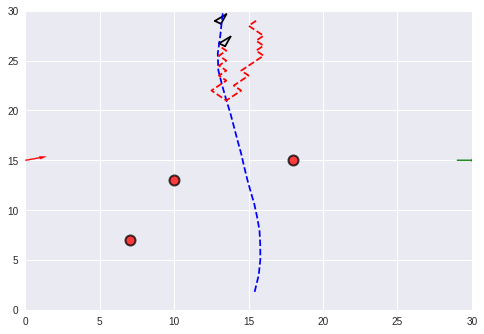

Step 29
Action:  [[0.9415298]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.9415298  13.
   27.5      ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


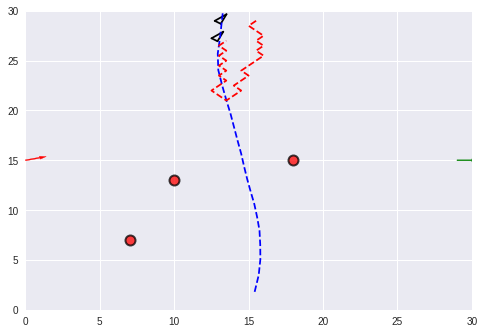

Step 30
Action:  [[0.84511304]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.84511304
   13.5         28.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


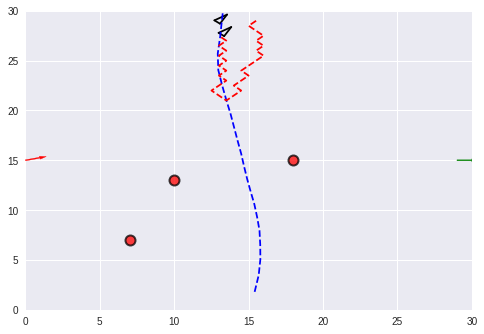

Step 31
Action:  [[0.82263756]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.82263756
   13.          28.5       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


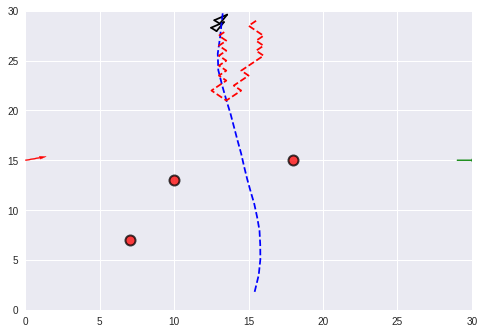

Step 32
Action:  [[0.74888194]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.74888194
   13.5         29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


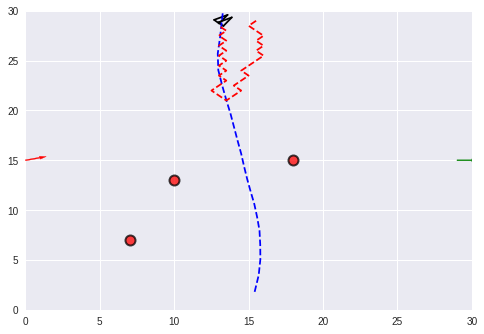

Step 33
Action:  [[0.7301047]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7301047  13.
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


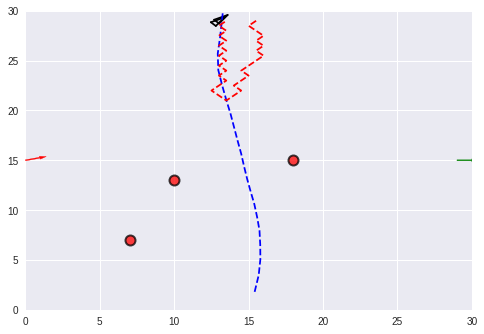

Step 34
Action:  [[0.71222556]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.71222556
   13.5         29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


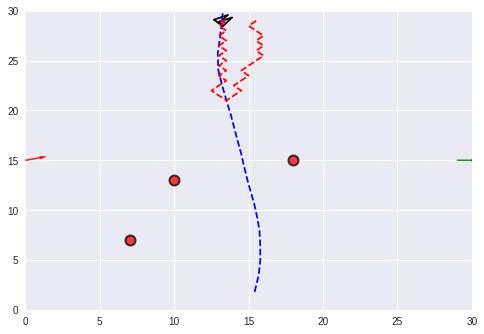

Step 35
Action:  [[0.7320127]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7320127  13.
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


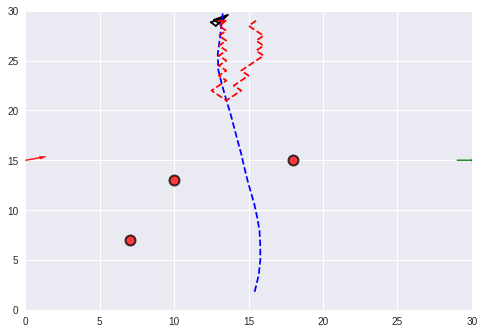

Step 36
Action:  [[0.71212846]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.71212846
   13.5         29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


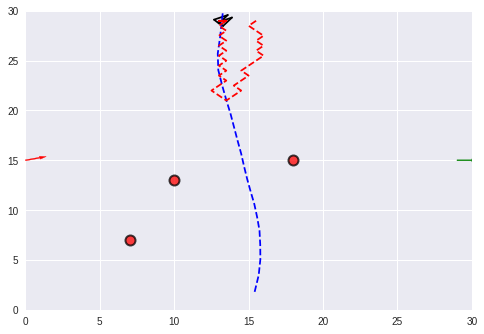

Step 37
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


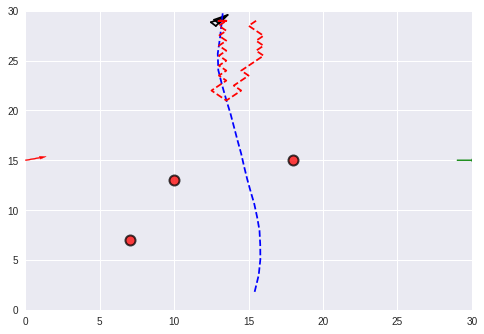

Step 38
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


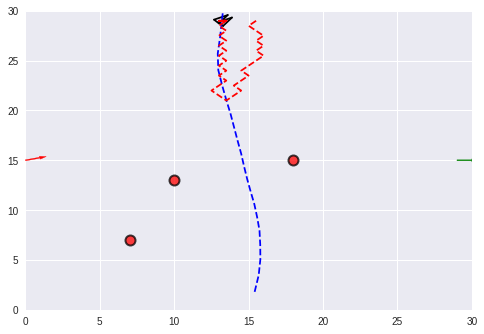

Step 39
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


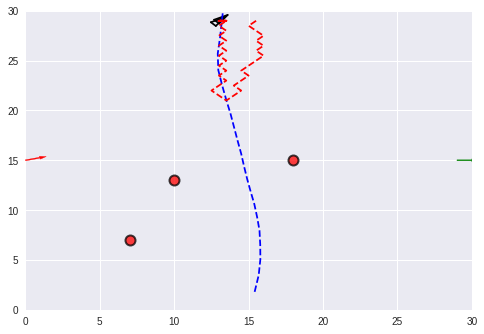

Step 40
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


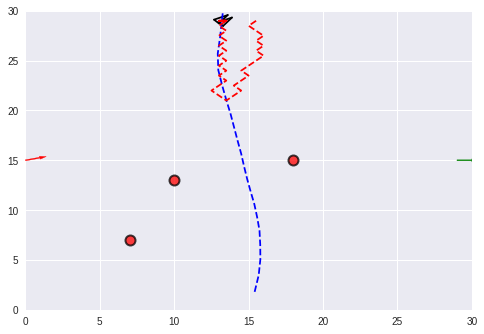

Step 41
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


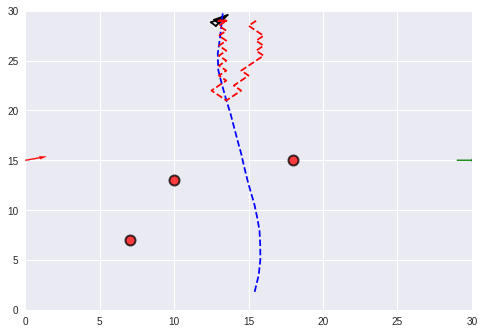

Step 42
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


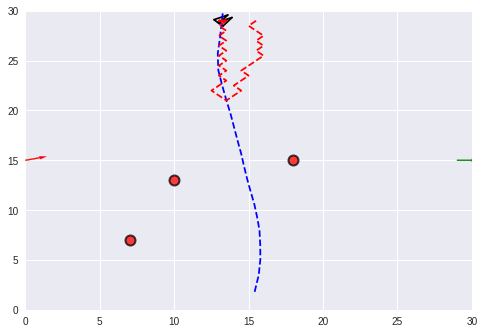

Step 43
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


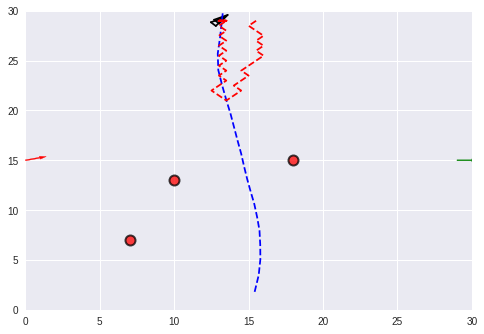

Step 44
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


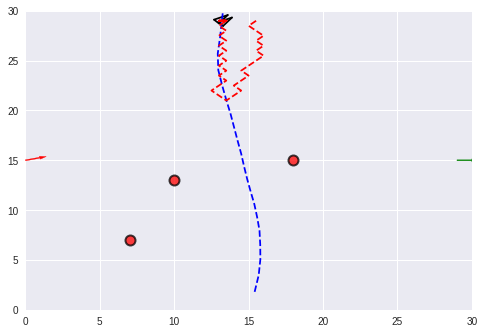

Step 45
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


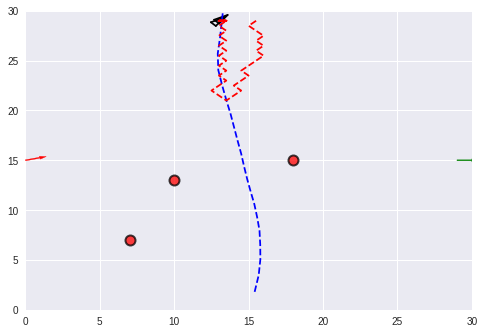

Step 46
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


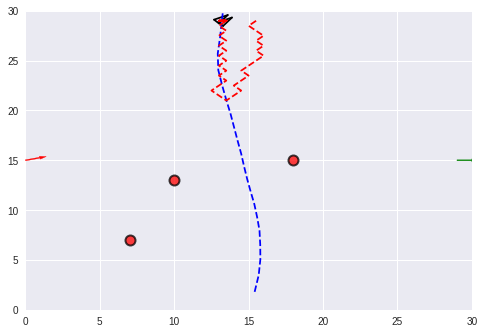

Step 47
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


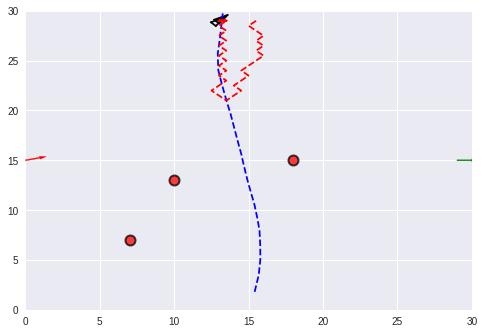

Step 48
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


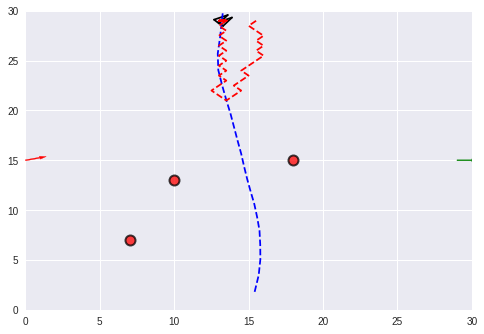

Step 49
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


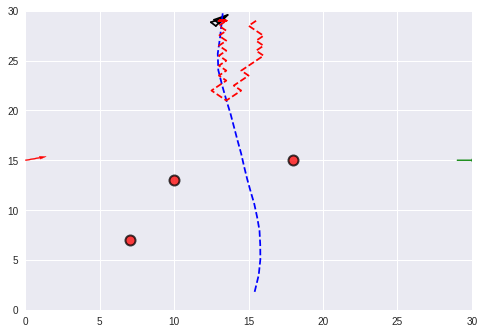

Step 50
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


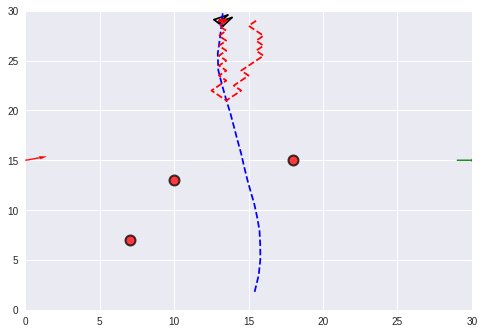

Step 51
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


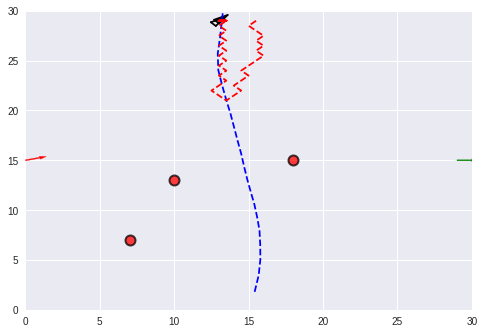

Step 52
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


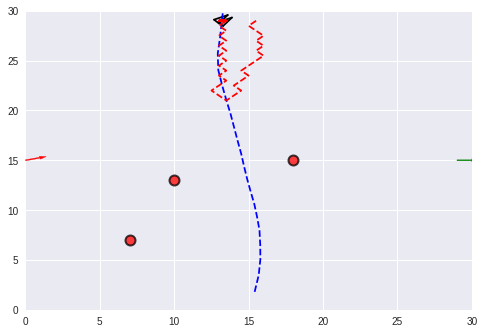

Step 53
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


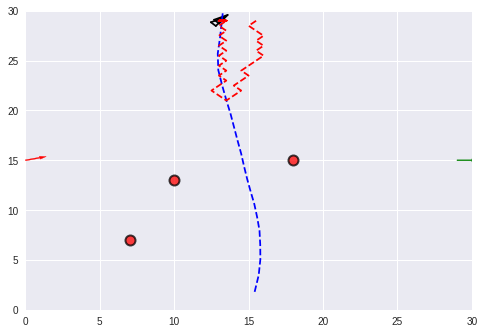

Step 54
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


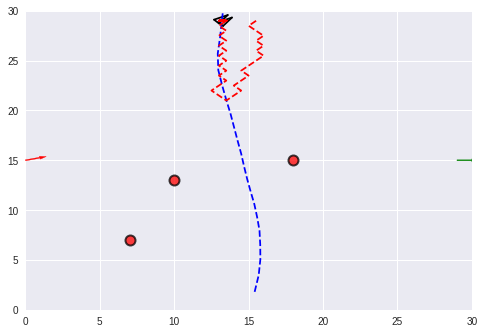

Step 55
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


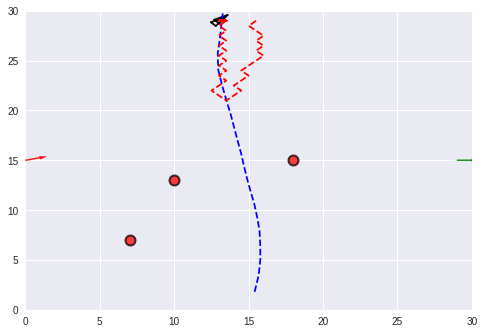

Step 56
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


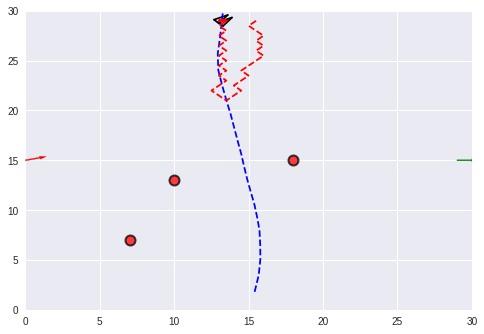

Step 57
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


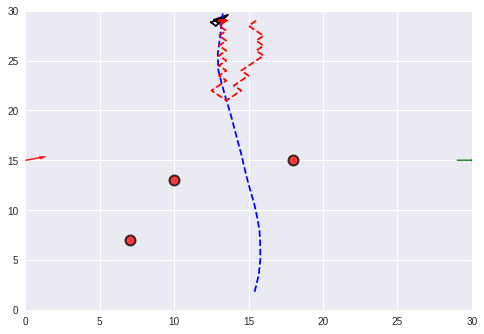

Step 58
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


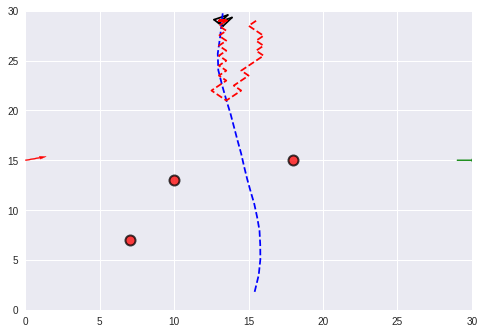

Step 59
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


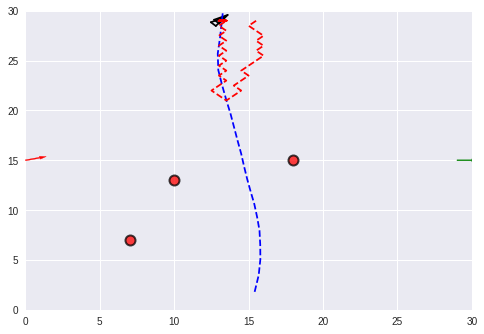

Step 60
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


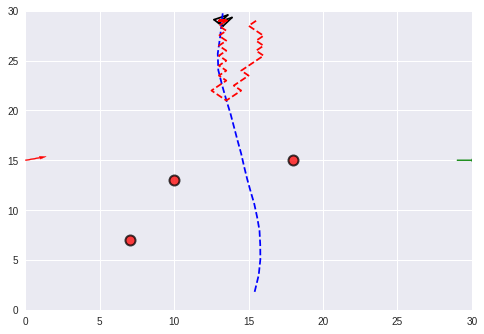

Step 61
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


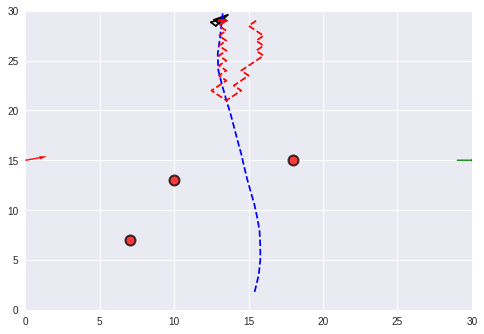

Step 62
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


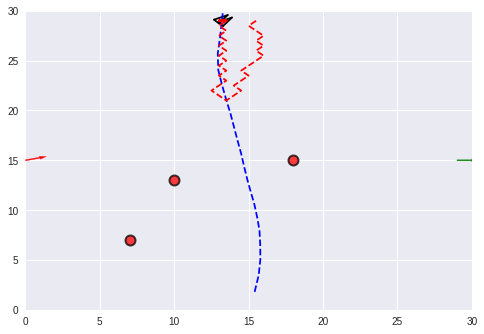

Step 63
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


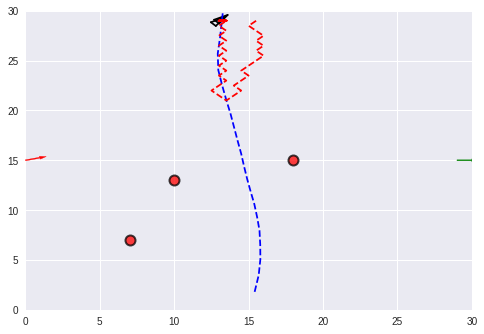

Step 64
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


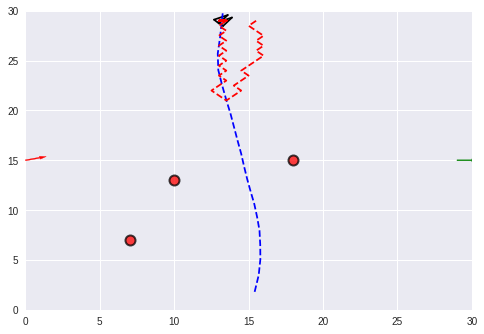

Step 65
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


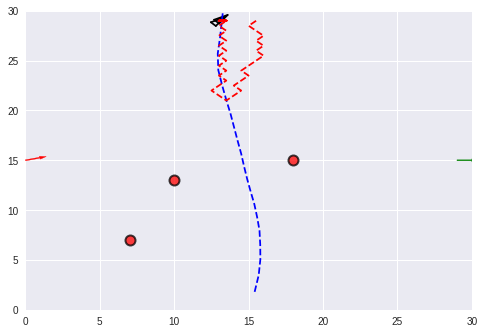

Step 66
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


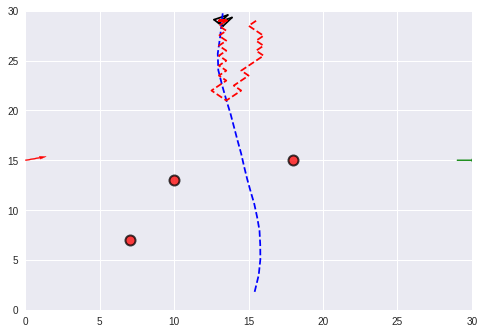

Step 67
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


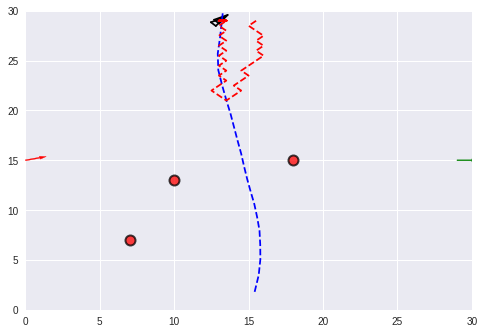

Step 68
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


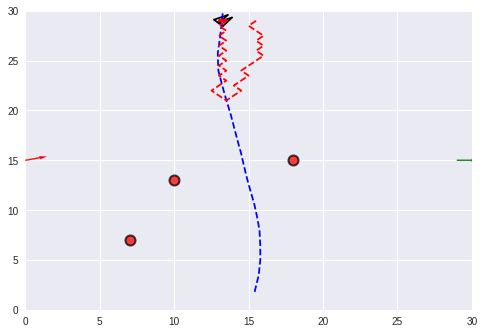

Step 69
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


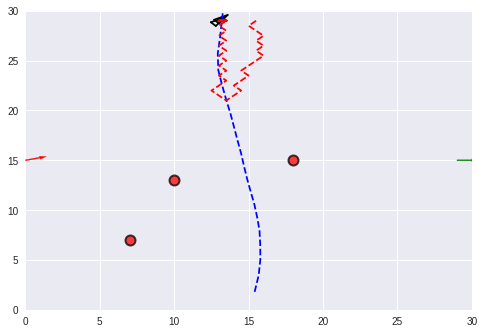

Step 70
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


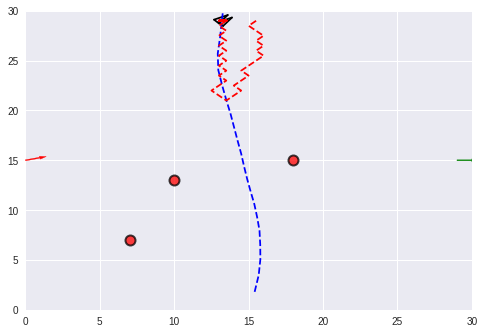

Step 71
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


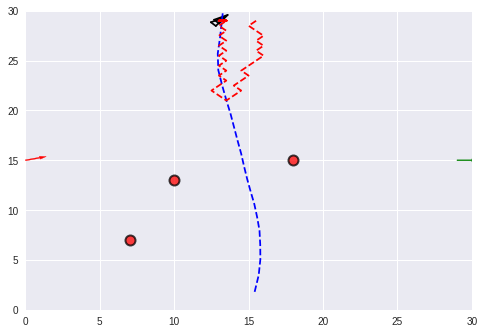

Step 72
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


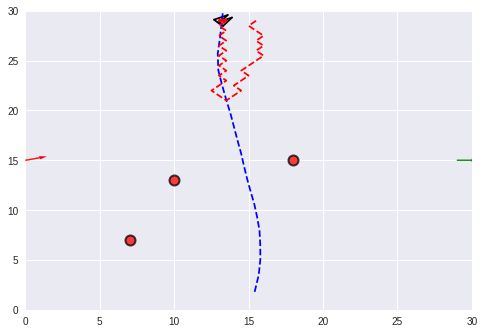

Step 73
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


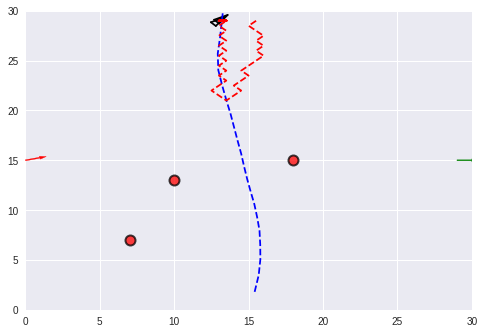

Step 74
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


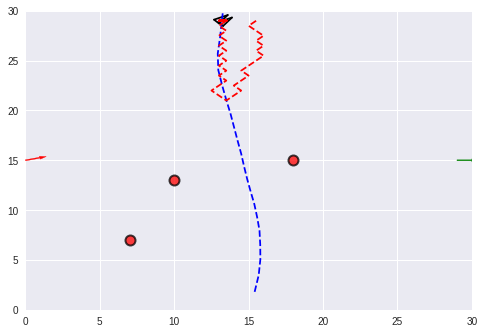

Step 75
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


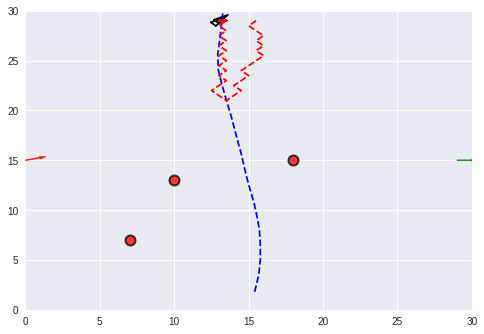

Step 76
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


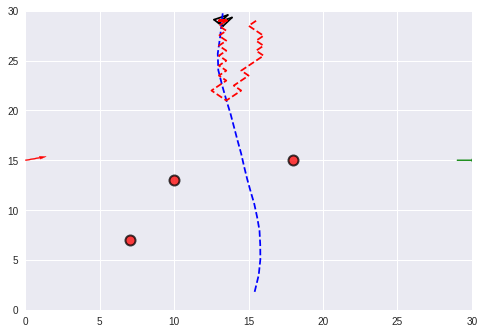

Step 77
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


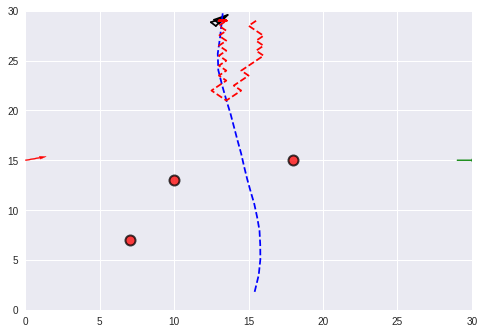

Step 78
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


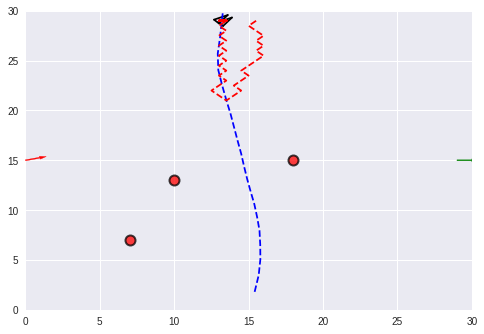

Step 79
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


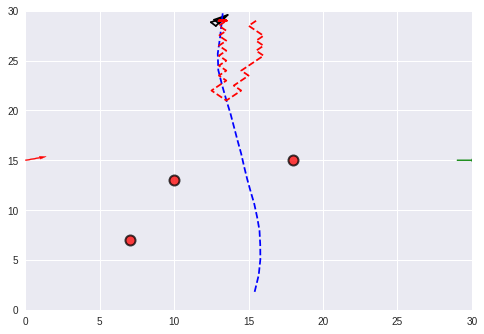

Step 80
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


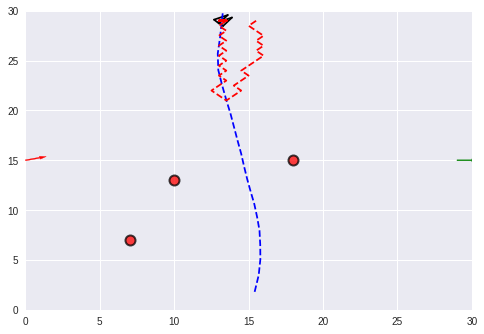

Step 81
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


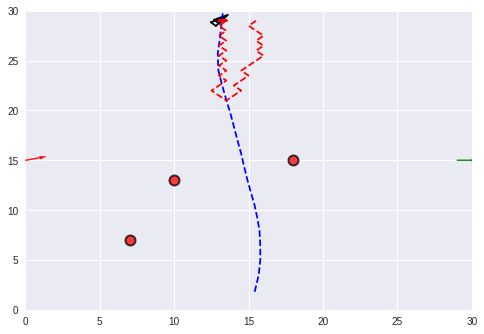

Step 82
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


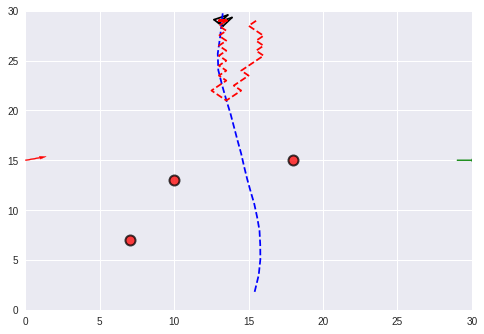

Step 83
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


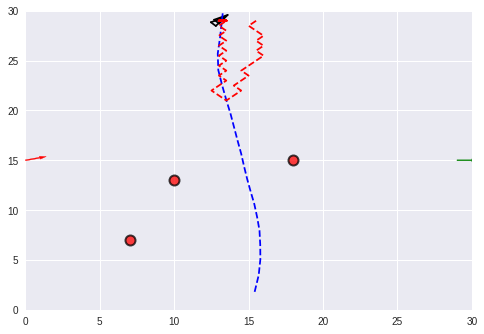

Step 84
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


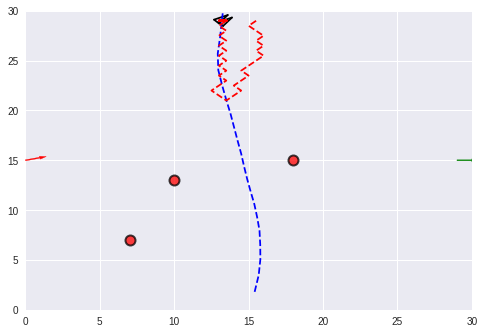

Step 85
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


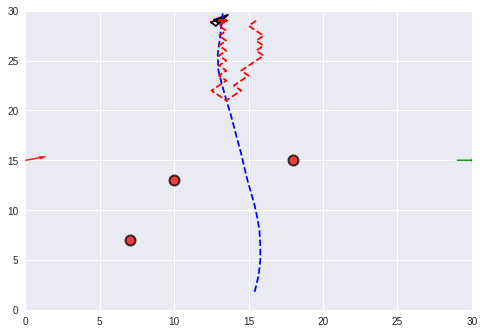

Step 86
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


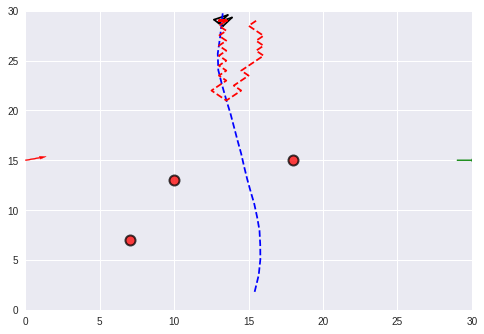

Step 87
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


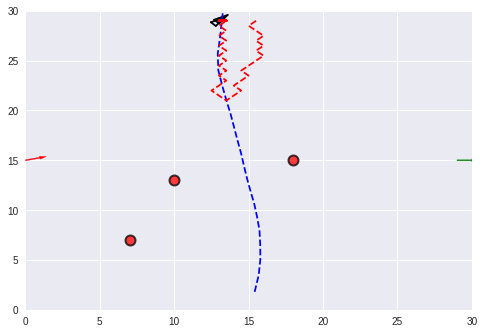

Step 88
Action:  [[0.7121282]]
obs= [[ 13.216861   29.25059     1.7831392 -14.250589    0.7121282  13.5
   29.       ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


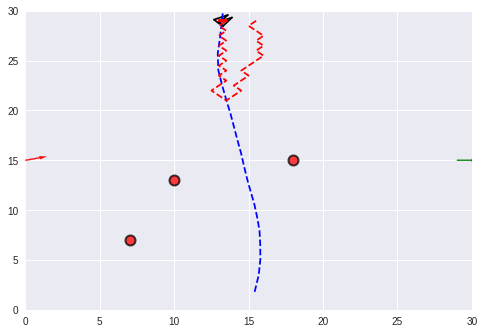

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 89
Action:  [[0.73201776]]
obs= [[ 13.216861    29.25059      1.7831392  -14.250589     0.73201776
   13.          29.        ]] reward= [-0.34745398] done= [False]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
obs = env.reset()
n_steps = 500
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    print("Goal reached!", "reward=", reward)
    break